**Descripcion del dataset**
**Contexto:**

En los Estados Unidos, las mordeduras de animales suelen denunciarse a las fuerzas del orden (como el control de animales). La principal preocupación de una mordedura de animal es que el animal pueda tener rabia. Este conjunto de datos incluye información sobre más de 9.000 mordeduras de animales ocurridas cerca de Louisville, Kentucky, entre 1985 y 2017, e incluye información sobre si el animal fue puesto en cuarentena después de la mordedura y si ese animal tenía rabia.

**Contenido:**

Atributos de los incidentes de mordeduras de animales reportados e investigados por el Departamento de Salud Pública y Bienestar de Louisville. Se han eliminado los datos personales e identificativos. Este conjunto de datos es un único .csv con los siguientes campos.

**bite_date:** La fecha en que se produjo la mordedura

**SpeciesIDDesc:** La especie del animal que realizó la mordedura

**BreedIDDesc:** Raza (si se conoce)

**GenderIDDesc:** Género (del animal)

**color:** color del animal

**vaccination_yrs:** cuántos años han pasado desde la última vacunación

**vaccination_date:** la fecha de la última vacunación

**victim_zip:** el código postal de la víctima

**AdvIssuedYNDesc:** si se emitió un consejo

**WhereBittenIDDesc:** en qué parte del cuerpo fue mordida la víctima

**quarantine_date:** si el animal fue puesto en cuarentena

**DispositionIDDesc:** si el animal fue liberado de la cuarentena

**headentdate:** la fecha en que la cabeza del animal fue enviada al laboratorio

**release_date:** la fecha en que el animal fue liberado

**ResultsIDDesc:** resultados de las pruebas de laboratorio (para la rabia)

**Reconocimientos:**

Atributos de los incidentes de mordeduras de animales notificados e investigados por el Departamento de Salud Pública y Bienestar de Louisville. Estos datos son de dominio público.

**Inspiración:**

¿Qué animales son más propensos a morder a los humanos?

¿Hay algunas razas de perros más propensas a morder?

¿Qué factores están más relacionados con una identificación positiva de rabia?



In [1547]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, StratifiedKFold,ShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

**LECTURA DE LOS DATOS**

In [1548]:
archivo=pd.read_csv('/content/drive/MyDrive/EXAMEN FINAL/Health_AnimalBites.csv')
archivo.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


**Muestra los estadisticos mas significativos del dataset**

In [1549]:
archivo.describe()

,vaccination_yrs
count,3738.000000
mean,1.452113
std,0.848416
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11.000000


**PREPROCESAMIENTO**

**Informacion de los datos**

In [1550]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


**Datos nulos de las columnas**

In [1551]:
archivo.isnull().sum()

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64

**Borrar lo nulos de la columna SpeciesIDDesc par un mejor prediccion**



In [1552]:
archivo=archivo.dropna(axis=0,subset=['SpeciesIDDesc'])
archivo.isnull().sum()

bite_date             300
SpeciesIDDesc           0
BreedIDDesc          5127
GenderIDDesc         2413
color                2464
vaccination_yrs      5148
vaccination_date     4772
victim_zip           1788
AdvIssuedYNDesc      6327
WhereBittenIDDesc     575
quarantine_date      6865
DispositionIDDesc    7350
head_sent_date       8495
release_date         7442
ResultsIDDesc        7345
dtype: int64

In [1553]:
#archivo.shape
display(archivo)
#tipo de la variable
archivo.info()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998,2017-09-05 00:00:00,DOG,NaN,NaN,NaN,NaN,NaN,40243,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
8999,2017-09-07 00:00:00,DOG,POMERANIAN,MALE,RED,NaN,NaN,40204,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
9000,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
9001,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8885 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8585 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3758 non-null   object 
 3   GenderIDDesc       6472 non-null   object 
 4   color              6421 non-null   object 
 5   vaccination_yrs    3737 non-null   float64
 6   vaccination_date   4113 non-null   object 
 7   victim_zip         7097 non-null   object 
 8   AdvIssuedYNDesc    2558 non-null   object 
 9   WhereBittenIDDesc  8310 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     390 non-null    object 
 13  release_date       1443 non-null   object 
 14  ResultsIDDesc      1540 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.1+ MB


**ANALISIS**

In [1554]:
especies=archivo.SpeciesIDDesc
especiesPorAnimal=especies.unique()
print(especiesPorAnimal)

['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' 'HORSE' 'SKUNK' 'FERRET']


**'PERRO' 'GATO' 'MURCIÉLAGO' 'MAPACHE' 'OTRO' 'CONEJO' 'CABALLO' 'MOFETA' 'HURÓN'**

**Cantidad de mordeduras por especie**

[7029, 1568, 237, 27, 11, 3, 5, 1, 4]


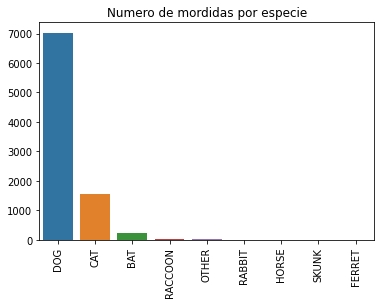

In [1555]:
animales_lista=[]
for i in especiesPorAnimal:
  animales_lista.append(len(especies[especies==i]))
especiess=sns.barplot(x=especiesPorAnimal,y=animales_lista)
plt.title('Numero de mordidas por especie')
plt.xticks(rotation=90)
print(animales_lista)

Las especies que tienen mayor cantidad son las perros, gatos y muercielagos.

**Cantidad de mordeduras por el tipo de raza del perro**

In [1556]:
razas=archivo.BreedIDDesc
porrazas=razas.unique()
print(porrazas)

[nan 'GERM SHEPHERD' 'DACHSHUND' 'PIT BULL' 'SHIH TZU' 'COCKER SPAINEL'
 'CHICHAUHUA' 'BEAGLE' 'CHOW CHOW' 'OTHER' 'BOXER' 'AAUST. TERR.'
 'GOLD RETRIEVER' 'LABRADOR RETRIV' 'BULLMASTIFF' 'BORDER COLLIE'
 'POMERANIAN' 'YORKSHIRE TERRIER' 'GREYHOUND' 'ROTTWEILER'
 'AMER. BULL DOG' 'DALMATIAN' 'HUSKY' 'BULL DOG' 'MASTIF'
 'GREAT PYRENEESE' 'GREAT DANE' 'POODLE' 'SIBERAN HUSKY' 'WEIMARANER'
 'CORGI' 'BOSTON TERRIER' 'SCHNAUZER' 'BASSET HOUND' 'MIN PIN'
 'WELSH CORGI' 'AM BULLDOG' 'SAMOYED' 'MALTASE' 'AKITA' 'SHELTIE'
 'LHASA APSO' 'SAINT BERNARD' 'AIREDALE TER.' 'AM. ESKIMO' 'BICHON FRISE'
 'PUG' 'DOBERMAN' 'DOTSON' 'NEW FOUNDLAND' 'BERNESEN MT.' 'HAVANESE'
 'ENGLISH SETTER' 'SHAR-PEI' 'COCKAPOO' 'OLD ENG SHP DOG' 'WESTIE'
 'BOUVIER' 'RAT TERRIER' 'SHEEP DOG' 'HEELER' 'PEKINGESE'
 'FOX TERRIER MIX' 'ENGLISH BULLDOG' 'BORDER COLLIE M' 'BASANJI' 'PYRENES'
 'BLOOD HOUND' 'COLLIE' 'ALASK. MALAMUTE' 'BRITNEY SPANIEL' 'BICHON FRESE'
 'FOX TERRIER' 'BLUE HEELER' 'CATAHOULA' 'CANE CORSO' 'IRISH S

In [1557]:
raza_lista=[]
cont1=0
for i in porrazas:
  cont1+=1
  raza_lista.append(len(razas[razas==i]))
print(raza_lista)
print("numero de razas",cont1)

[0, 327, 67, 1101, 119, 30, 165, 116, 46, 35, 181, 78, 60, 253, 22, 47, 38, 46, 11, 86, 21, 4, 34, 34, 27, 10, 43, 50, 26, 16, 9, 29, 39, 22, 27, 8, 26, 4, 28, 28, 10, 7, 6, 3, 5, 4, 20, 32, 17, 2, 7, 6, 4, 11, 2, 1, 14, 2, 20, 7, 3, 9, 1, 28, 18, 5, 2, 8, 16, 9, 5, 7, 8, 10, 5, 40, 3, 4, 3, 23, 4, 3, 11, 1, 3, 6, 2, 4, 4, 1, 4, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1]
numero de razas 102


Elegimos las 10 primera razas ya que tienen mayor cantidad de mordeduras

Index(['PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETRIV', 'BOXER', 'CHICHAUHUA',
       'SHIH TZU', 'BEAGLE', 'ROTTWEILER', 'AAUST. TERR.', 'DACHSHUND'],
      dtype='object')


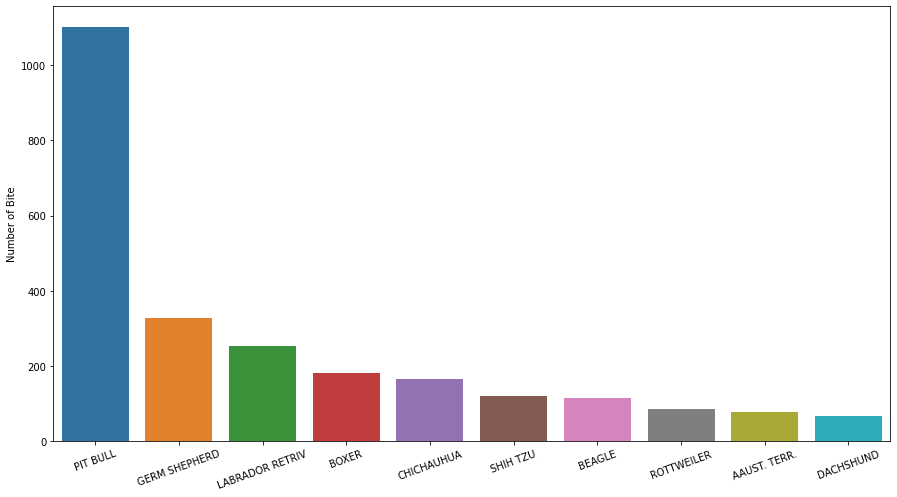

In [1558]:
count = archivo.BreedIDDesc.value_counts()
plt.figure(figsize=(15,8))
razass = sns.barplot(x=count[0:10].index,y=count[0:10])
plt.xticks(rotation=20)
plt.ylabel("Number of Bite")
plt.savefig('graph.png')

print(count[0:10].index)


**Cantidad de mordeduras por su genero macho o hembra**

MALE      3831
FEMALE    2014
Name: GenderIDDesc, dtype: int64


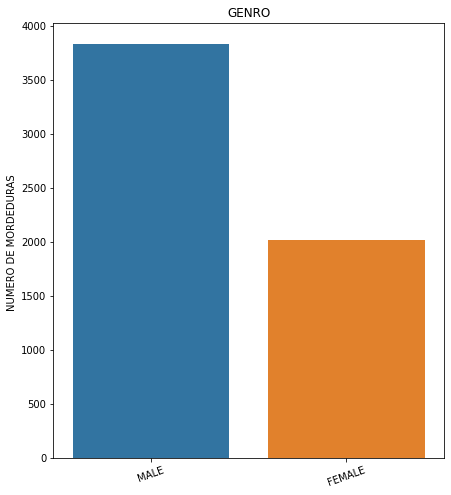

In [1559]:
genero=['MALE','FEMALE']
cantidad=archivo.GenderIDDesc.value_counts()
plt.figure(figsize=(7,8))
geneross=sns.barplot(x=genero,y=cantidad[0:2])
plt.ylabel('NUMERO DE MORDEDURAS ')
plt.xticks(rotation = 20)
plt.title('GENRO')
print(cantidad[0:2])

**Las otras columnas que tienen null se las reemplaza por la medio**





In [1560]:
archivo = archivo.replace("?", np.NaN)
archivo= archivo.fillna(archivo.mean())
for column in archivo.columns:
    if archivo[column].dtypes == 'object':
        archivo[column] = archivo[column].fillna(archivo[column].value_counts().index[0])
archivo.isnull().sum()

bite_date            0
SpeciesIDDesc        0
BreedIDDesc          0
GenderIDDesc         0
color                0
vaccination_yrs      0
vaccination_date     0
victim_zip           0
AdvIssuedYNDesc      0
WhereBittenIDDesc    0
quarantine_date      0
DispositionIDDesc    0
head_sent_date       0
release_date         0
ResultsIDDesc        0
dtype: int64

**Convertir lo datos no numéricos en valores numéricos**

In [1561]:
#convertir los valores no numericos en valores numericos
le = LabelEncoder()

for column in archivo.columns:
    if archivo[column].dtype=='object':
        archivo[column]=le.fit_transform(archivo[column])

archivo

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,2,2,74,0,410,1.000000,0,106,0,0,0,3,16,325,2
1,3,2,74,2,242,1.452234,1663,98,0,0,1,3,16,325,2
2,4,2,74,2,18,1.452234,1663,99,0,0,4,3,16,325,2
3,5,2,74,1,15,1.452234,1663,118,0,0,8,3,16,325,2
4,6,2,74,0,106,1.452234,1663,118,0,0,109,3,16,325,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998,2688,2,74,1,18,1.452234,1663,110,0,2,109,2,16,325,2
8999,2690,2,75,1,461,1.452234,1663,84,0,1,109,2,16,325,2
9000,2690,2,63,1,248,1.452234,1663,183,0,2,109,2,16,325,2
9001,2690,2,63,0,90,1.452234,1663,106,0,0,109,2,16,325,2


**Escogemos la variable dependiente(clase) y las independientes**

Para poner realizar el modelo de entrenamiento

*   la columna 2 es la variable dependiente 
*   las demás columnas son variables independientes






In [1562]:
X=[]
X=archivo.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14]]
X

,bite_date,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,2,74,0,410,1.000000,0,106,0,0,0,3,16,325,2
1,3,74,2,242,1.452234,1663,98,0,0,1,3,16,325,2
2,4,74,2,18,1.452234,1663,99,0,0,4,3,16,325,2
3,5,74,1,15,1.452234,1663,118,0,0,8,3,16,325,2
4,6,74,0,106,1.452234,1663,118,0,0,109,3,16,325,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998,2688,74,1,18,1.452234,1663,110,0,2,109,2,16,325,2
8999,2690,75,1,461,1.452234,1663,84,0,1,109,2,16,325,2
9000,2690,63,1,248,1.452234,1663,183,0,2,109,2,16,325,2
9001,2690,63,0,90,1.452234,1663,106,0,0,109,2,16,325,2


In [1563]:
y=archivo.iloc[:,1]
y

0       2
1       2
2       2
3       2
4       2
       ..
8998    2
8999    2
9000    2
9001    2
9002    2
Name: SpeciesIDDesc, Length: 8885, dtype: int64

In [1564]:
X=np.array(X)
print(X)
y=np.array(y)
print(y)

[[2.00e+00 7.40e+01 0.00e+00 ... 1.60e+01 3.25e+02 2.00e+00]
 [3.00e+00 7.40e+01 2.00e+00 ... 1.60e+01 3.25e+02 2.00e+00]
 [4.00e+00 7.40e+01 2.00e+00 ... 1.60e+01 3.25e+02 2.00e+00]
 ...
 [2.69e+03 6.30e+01 1.00e+00 ... 1.60e+01 3.25e+02 2.00e+00]
 [2.69e+03 6.30e+01 0.00e+00 ... 1.60e+01 3.25e+02 2.00e+00]
 [2.69e+03 2.40e+01 1.00e+00 ... 1.60e+01 3.25e+02 2.00e+00]]
[2 2 2 ... 2 2 2]


despues debes estandanraizar los datos de X

In [1565]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-1.76298841,  0.41581005, -1.61550127, ..., -0.18037621,
         0.03509137,  0.18661334],
       [-1.761723  ,  0.41581005,  2.21318072, ..., -0.18037621,
         0.03509137,  0.18661334],
       [-1.76045759,  0.41581005,  2.21318072, ..., -0.18037621,
         0.03509137,  0.18661334],
       ...,
       [ 1.63843417, -0.17017443,  0.29883973, ..., -0.18037621,
         0.03509137,  0.18661334],
       [ 1.63843417, -0.17017443, -1.61550127, ..., -0.18037621,
         0.03509137,  0.18661334],
       [ 1.63843417, -2.24775577,  0.29883973, ..., -0.18037621,
         0.03509137,  0.18661334]])

**Finaliza el prepocesamiento**

Realizamos las 10 particiones en cada vez que se ejecute el clasificador

In [1566]:
cv =StratifiedKFold(n_splits=10,random_state=0)
cv.get_n_splits(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10

Funcion para graficar la matriz de confusion

In [1567]:
#hacer un funcion para graficar la matriz de confusion
def matriz_confusion(matriz,title='Matrizde confusion',cmap=plt.cm.Blues):
  plt.matshow(matriz,cmap=cmap)
  plt.colorbar()


**Empezar a realizar el entrenamiento en los datos ya procesados**

TRAIN: 1
**Red neuronal**


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Prediccion y:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2

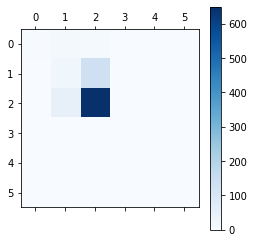

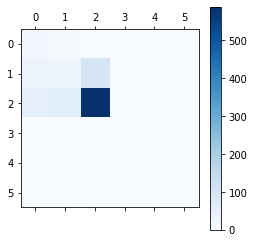

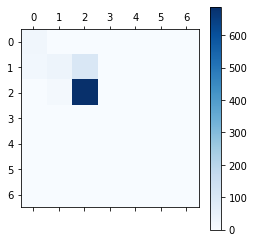

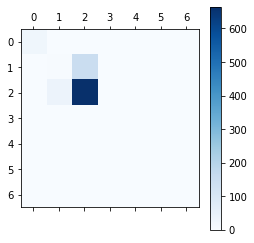

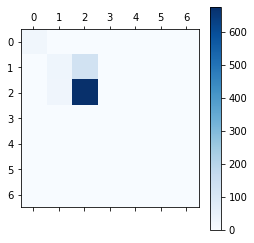

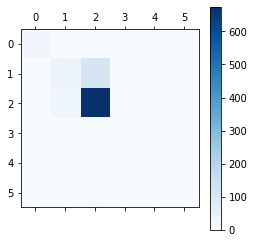

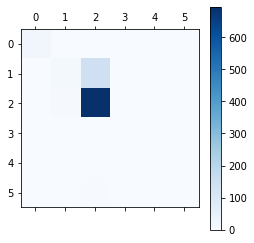

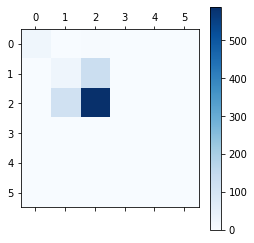

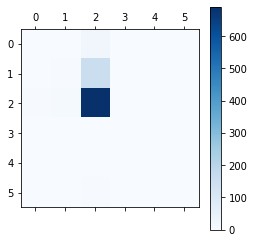

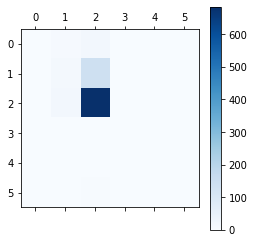

In [1568]:
cont=0
for train_index, test_index in cv.split(X,y):
    cont+=1
    print("TRAIN:", cont)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('**Red neuronal**')
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500, alpha=0.0001,solver='adam', random_state=300)
    mlp.fit(X_train, y_train)
    prediccion_y=mlp.predict(X_test)
    score=mlp.score(X_test, y_test)
    matriz=confusion_matrix(y_test, prediccion_y)
    print('Prediccion y:\n',prediccion_y)
    print('Score Red Neuronal: ',score)
    print(matriz)
    matriz_confusion(matriz)
    print('Arbol de decisión')
    arbol = DecisionTreeClassifier(max_depth = 2, random_state = 21)
    arbol.fit(X_train, y_train)
    prediccionad=arbol.predict(X_test)
    scoread=arbol.score(X_test, y_test)
    print("Score Árbol de decisión: ", scoread)

**Conclusion**
en el caso de los 10 splits
el clasificador de la red neuronal tiene un 83%
mientras que el clasificador del arbol de decisiones tiene un 81% por cual en este caso seria mejor una red neuronal. Tambien se da entender que hay mas casos de ataques de mordeduros de perros.